In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/kaggle/input/zomato-bangalore-restaurants/zomato.csv")

In [4]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Data Cleaning (if required)

In [6]:
data.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


url, address, phone, menu item(which is empty), dish liked and review list are being dropped

In [7]:
data.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis=1, inplace=True)

In [8]:
data.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [9]:
data.shape

(51717, 11)

In [10]:
# dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

(51609, 11)

As we can see some rows were removed. this means there were some duplicates in the dataset

Now in the rate column we will remove the /5 part

In [11]:
data['rate'].unique()
# data['rate'].str.split('/')

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

removing 'New', '-' and /5 at the end in column rate

In [12]:
def handlerate(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
    
data['rate']=data['rate'].apply(handlerate)
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Now lets handle the null values in the dataset

In [13]:
data.rate.isnull().sum()

10019

We will be filling the null values in rate column with the mean

In [14]:
data['rate'].fillna(data['rate'].mean(), inplace=True)
data.rate.isnull().sum()

/tmp/ipykernel_18/3887709726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rate'].fillna(data['rate'].mean(), inplace=True)


0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


Now we will attempt filling in the empty values for location

In [16]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

The amount of null values is less so we can just drop them

In [17]:
data.dropna(inplace=True)
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [18]:
data.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


We gonna rename 2 cols coz their name is lengthy af: approx_cost(for two people) - cost2plates, listed_in(type) - Type

In [19]:
data.rename(columns={'approx_cost(for two people)':'cost2plates', 'listed_in(type)':'type'}, inplace=True)

In [20]:
data.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'type', 'listed_in(city)'],
      dtype='object')

In [21]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [22]:
(data.location.unique())

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [23]:
(data['listed_in(city)'].unique())

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

Since both the above columns contain location, we can drop one of them. In this can we will drop listed_in(city) column

In [24]:
data.drop(columns=['listed_in(city)'], axis=1, inplace=True)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [25]:
data.cost2plates.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

We can see that there are some numbers that contain comma. We need to remove this comma so that we can use it as integer instead of string.

In [26]:
# def removeComma(value):
#     value=str(value).replace(',','')
#     return float(value)

def removeComma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)

data['cost2plates']=data['cost2plates'].apply(removeComma)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [27]:
data.cost2plates.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [28]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [29]:
data['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

As we can see the value counts for unique restraunt types. Any value count below 1000 we will categorize as others.

In [30]:
rest_types=data['rest_type'].value_counts(ascending=True)
rest_types

rest_type
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Dessert Parlor, Food Court        2
Food Court, Beverage Shop         2
Cafe, Food Court                  2
                              ...  
Dessert Parlor                 2242
Delivery                       2574
Cafe                           3682
Casual Dining                 10253
Quick Bites                   19010
Name: count, Length: 93, dtype: int64

In [31]:
rest_type_lessthan1000=rest_types[rest_types<1000]
rest_type_lessthan1000

rest_type
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Dessert Parlor, Food Court      2
Food Court, Beverage Shop       2
Cafe, Food Court                2
                             ... 
Bar, Casual Dining            411
Sweet Shop                    468
Food Court                    616
Bar                           686
Beverage Shop                 863
Name: count, Length: 85, dtype: int64

Now lets assign all the rest_type_lessthan1000 as others in dataframe

In [32]:
def rest_type_as_others(value):
    if (value in rest_type_lessthan1000):
        return 'others'
    else:
        return value

data['rest_type']=data['rest_type'].apply(rest_type_as_others)
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


Cleaning location column

In [33]:
data['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

We are going to categorize all location whose frequency is less than 300 as others.

In [34]:
loc_freq=data['location'].value_counts(ascending=True)
loc_freq

location
Peenya                      1
Rajarajeshwari Nagar        2
Jakkur                      3
Yelahanka                   5
West Bangalore              6
                         ... 
Whitefield               2105
JP Nagar                 2218
Koramangala 5th Block    2479
HSR                      2494
BTM                      5056
Name: count, Length: 93, dtype: int64

In [35]:
loc_freq_lessthan300=loc_freq[loc_freq<300]
loc_freq_lessthan300

location
Peenya                             1
Rajarajeshwari Nagar               2
Jakkur                             3
Yelahanka                          5
West Bangalore                     6
Central Bangalore                  8
Kengeri                            8
Nagarbhavi                         9
Hebbal                            14
North Bangalore                   14
Uttarahalli                       17
KR Puram                          18
Kanakapura Road                   19
Old Madras Road                   22
Mysore Road                       22
Sankey Road                       27
Langford Town                     27
Rammurthy Nagar                   32
Magadi Road                       34
Jalahalli                         38
East Bangalore                    43
Koramangala                       48
Sahakara Nagar                    53
Sadashiv Nagar                    63
Sanjay Nagar                      76
Vijay Nagar                       78
RT Nagar                     

In [36]:
def loc_as_others(value):
    if (value in loc_freq_lessthan300):
        return 'others'
    else:
        return value
    
data['location']=data['location'].apply(loc_as_others)
data.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,"Pizza, Cafe, Italian",600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Cafe, Italian, Continental",700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes


lets try to clean cuisines column

In [37]:
data['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

Now we will mark all cuisines with a frequency of less than 100 as others.

In [38]:
cuisines_types=data['cuisines'].value_counts(ascending=True)
cuisines_types

cuisines
North Indian, Chinese, Arabian, Momos               1
Kerala, Biryani, Seafood, North Indian              1
Street Food, Mithai, North Indian                   1
Fast Food, Street Food, North Indian, Biryani       1
Chinese, North Indian, Andhra, South Indian         1
                                                 ... 
Bakery, Desserts                                  898
Biryani                                           903
South Indian                                     1820
North Indian, Chinese                            2351
North Indian                                     2852
Name: count, Length: 2704, dtype: int64

In [39]:
cuisines_types_lessthan100=cuisines_types[cuisines_types<100]
cuisines_types_lessthan100

cuisines
North Indian, Chinese, Arabian, Momos             1
Kerala, Biryani, Seafood, North Indian            1
Street Food, Mithai, North Indian                 1
Fast Food, Street Food, North Indian, Biryani     1
Chinese, North Indian, Andhra, South Indian       1
                                                 ..
Chinese, North Indian, South Indian              90
Fast Food, North Indian                          93
Bengali, North Indian                            93
Juices                                           94
North Indian, Continental, Chinese               97
Name: count, Length: 2635, dtype: int64

In [40]:
def cuisines_types_others(value):
    if (value in cuisines_types_lessthan100):
        return 'others'
    else:
        return value
    
data['cuisines']=data['cuisines'].apply(cuisines_types_others)
data.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6,8,others,Casual Dining,others,800.0,Buffet
7,Onesta,Yes,Yes,4.6,2556,Banashankari,others,others,600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,others,700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,others,550.0,Cafes


In [41]:
data['type'].value_counts()

type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

The type column looks already clean so no need cluster them.

Now that we have cleaned all the columns one-by-one so lets do EDA.

# EDA

In [42]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   cost2plates   51042 non-null  float64
 9   type          51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

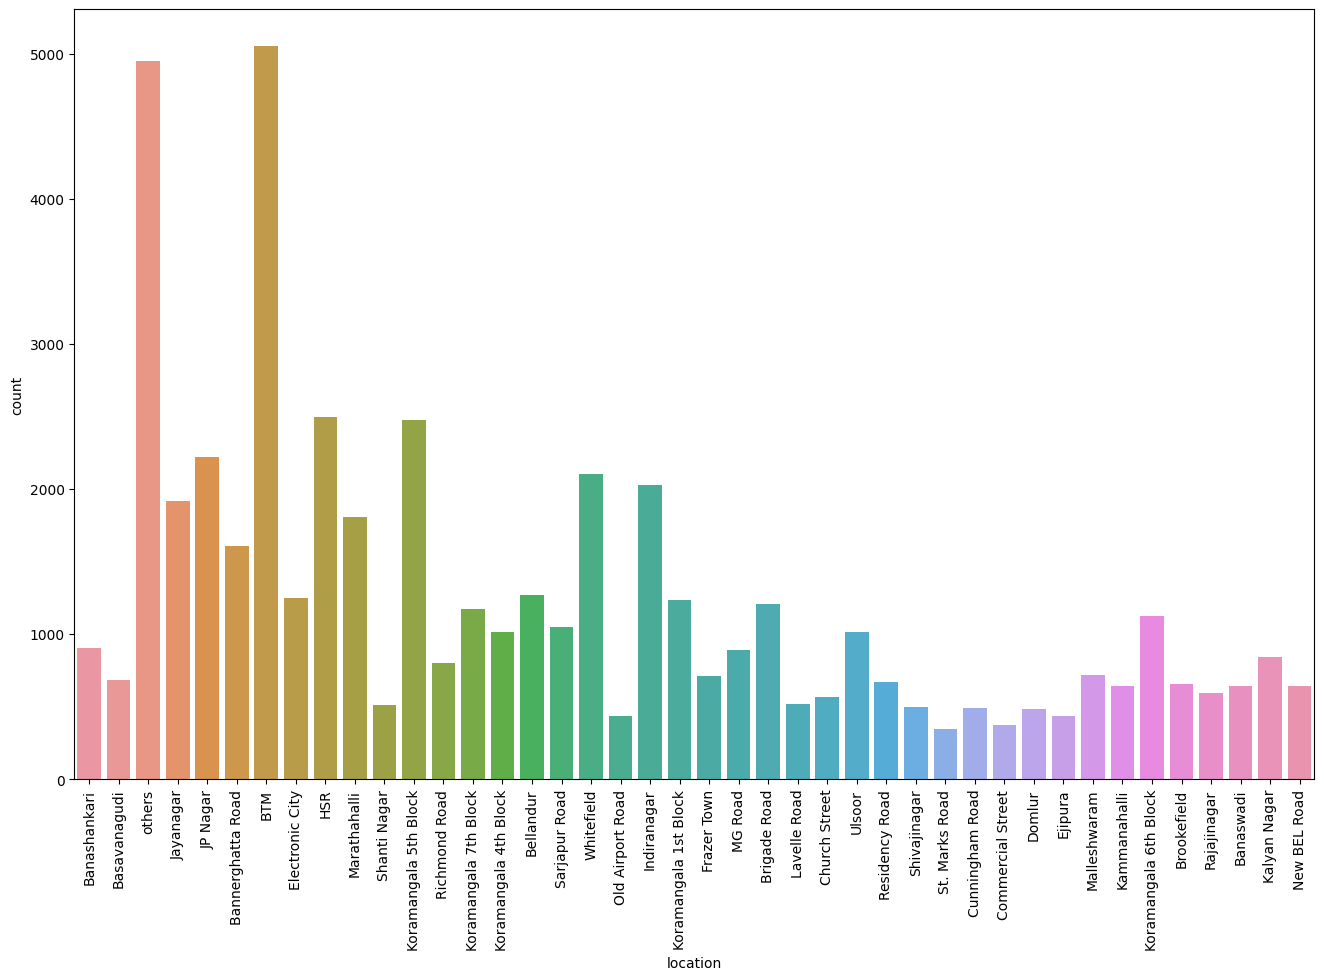

In [44]:
plt.figure(figsize=(16,10))
ax=sns.countplot(x="location", data=data)
plt.xticks(rotation=90)

Visualizing the online order

<Axes: xlabel='online_order', ylabel='count'>

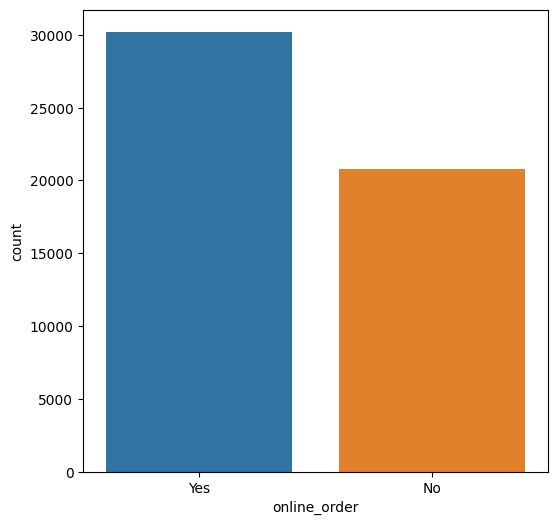

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='online_order', data=data)

Most restraunts have online facilty

In [46]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


<Axes: xlabel='book_table', ylabel='count'>

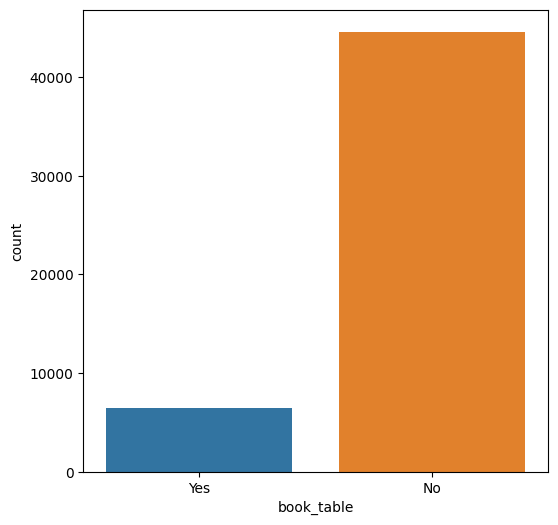

In [47]:
plt.figure(figsize=(6,6))
sns.countplot(x='book_table', data=data)

Most restraunts don't have pre-booking facilty

In [48]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


Lets compare the online_order restraunts and their ratings.

<Axes: xlabel='online_order', ylabel='rate'>

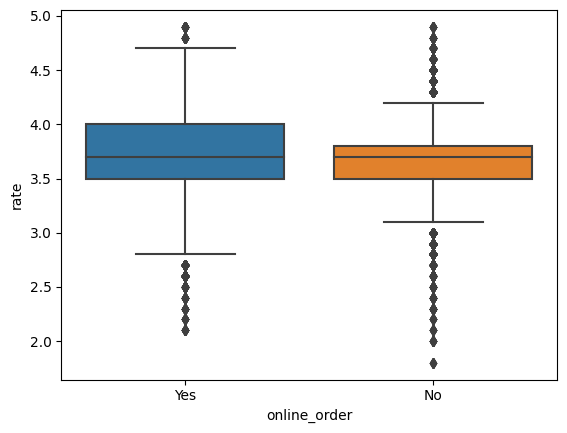

In [49]:
sns.boxplot(x=data['online_order'], y=data['rate'])

Lets compare the book_table restraunts and their ratings.

<Axes: xlabel='book_table', ylabel='rate'>

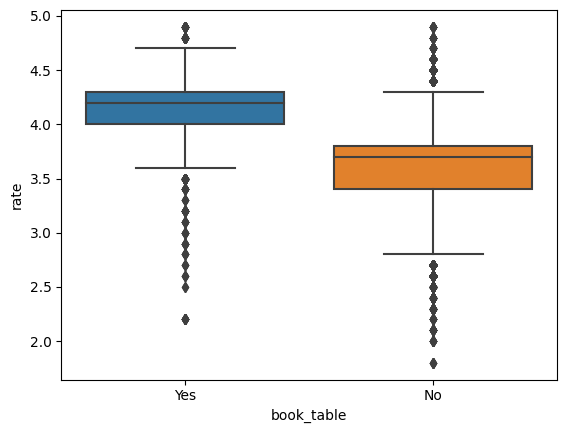

In [50]:
sns.boxplot(x=data['book_table'], y=data['rate'])

Here we can see that the restraunts where we have booking facility have better average ratings

In [51]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


Lets visualize online order facility location wise

In [52]:
online_order_locationwise_df=data.groupby(['location','online_order'])['name'].count()
df1=pd.DataFrame(online_order_locationwise_df)
df2=df1.pivot_table(df1, index=['location'], columns=['online_order'])
df2.head()

name        
online_order           No     Yes
location                         
BTM                1763.0  3293.0
Banashankari        397.0   505.0
Banaswadi           302.0   338.0
Bannerghatta Road   685.0   924.0
Basavanagudi        243.0   441.0

<Axes: xlabel='location'>

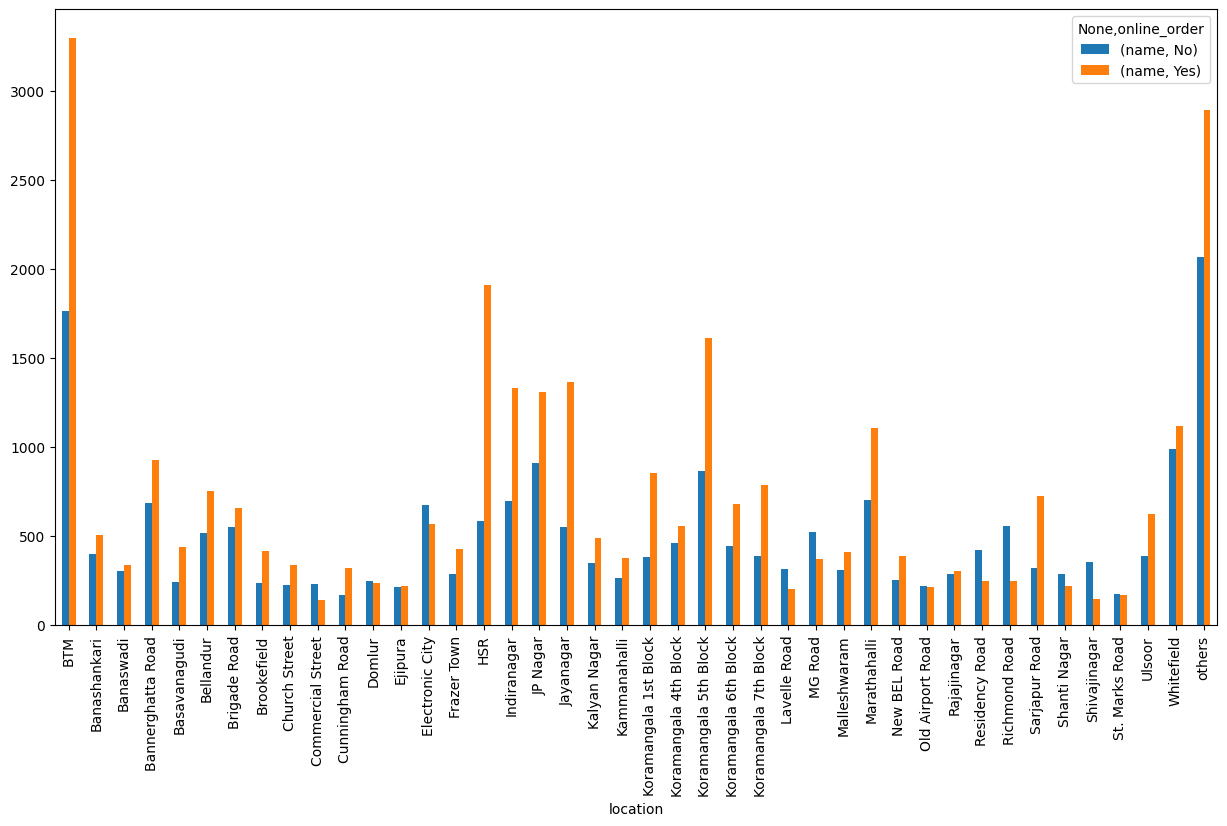

In [53]:
df2.plot(kind='bar', figsize=(15,8))

Now lets visualize book table facility location wise

In [54]:
booktable_locationwise_df=data.groupby(['location','book_table'])['name'].count()
df3=pd.DataFrame(booktable_locationwise_df)
df4=df3.pivot_table(df3, index=['location'], columns=['book_table'])
df4.head()

name       
book_table             No    Yes
location                        
BTM                4889.0  167.0
Banashankari        839.0   63.0
Banaswadi           632.0    8.0
Bannerghatta Road  1510.0   99.0
Basavanagudi        668.0   16.0

<Axes: xlabel='location'>

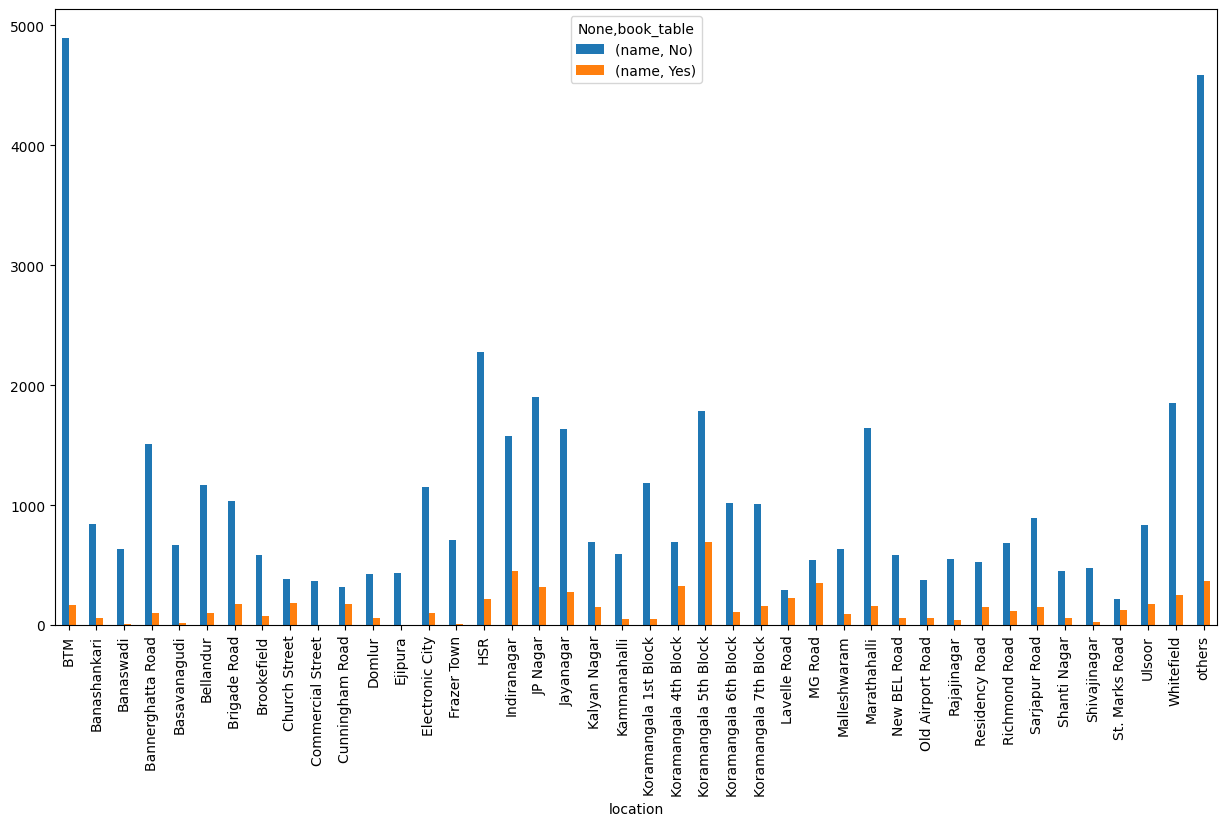

In [55]:
df4.plot(kind='bar', figsize=(15,8))

Lets visualize types of restraunt vs rates

In [56]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


<Axes: xlabel='type', ylabel='rate'>

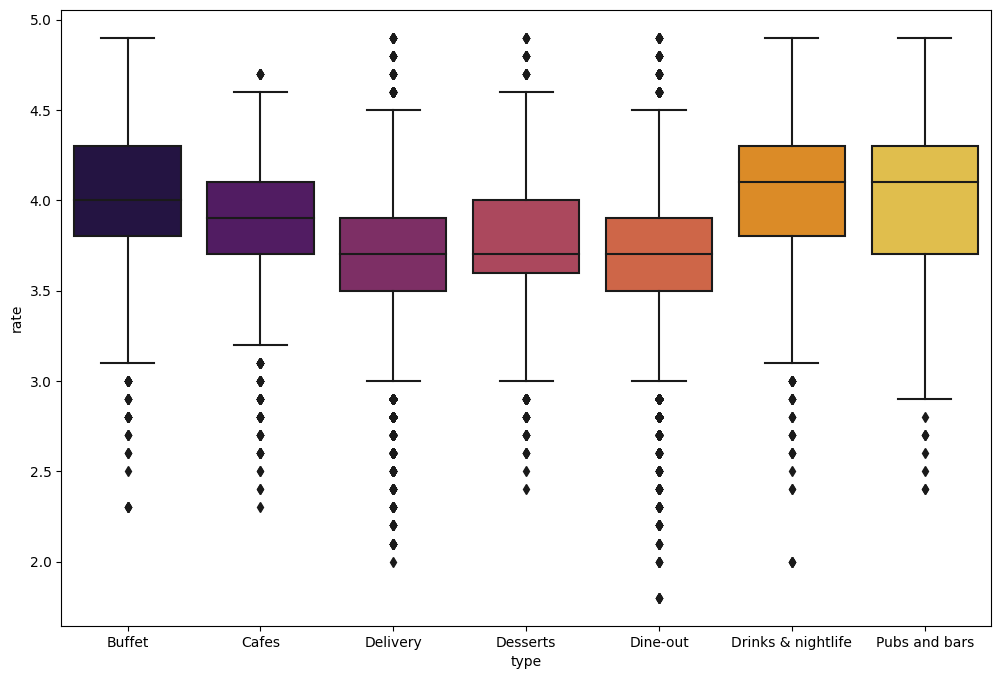

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x='type', y='rate', data=data, palette='inferno')
# sns.boxplot(x=data['type'], y=data['rate'], data=data, palette='inferno')

Drinks and nighlife type of restraunts have great average rating. Similar with pubs and bars

Now grouping types of restraunt types by locations

In [58]:
data.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet


In [59]:
dataframe1=data.groupby(['location', 'type'])['name'].count()
dataframe1=pd.DataFrame(dataframe1)
dataframe1=pd.pivot_table(dataframe1, values=None, index=['location'], columns=['type'], fill_value=0)

In [60]:
dataframe1

name                                    \
type                  Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3053.0    198.0   1660.0   
Banashankari             7.0   36.0    418.0     71.0    356.0   
Banaswadi                0.0   24.0    310.0     37.0    262.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    578.0   
Basavanagudi             7.0   11.0    344.0     66.0    251.0   
Bellandur               28.0   36.0    617.0     75.0    479.0   
Brigade Road            25.0   46.0    497.0    108.0    455.0   
Brookefield              6.0   17.0    339.0     45.0    245.0   
Church Street           19.0   51.0    193.0     29.0    215.0   
Commercial Street        0.0   13.0    121.0     77.0    159.0   
Cunningham Road         29.0   34.0    194.0     26.0    184.0   
Domlur                  15.0   13.0    261.0     35.0    135.0   
Ejipura                  0.0    0.0    245.0     16.0    172.0   
Electronic City         23.0   24.0    570.0     71.0    516.0   
Frazer Town              1.0   11.0    470.0     56.0    172.0   
HSR                     19.0   49.0   1694.0    120.0    580.0   
Indiranagar             38.0   97.0   1091.0    140.0    529.0   
JP Nagar                45.0   76.0   1151.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Kalyan Nagar             9.0   45.0    366.0     88.0    315.0   
Kammanahalli             2.0   27.0    329.0     35.0    240.0   
Koramangala 1st Block    3.0   26.0    716.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1075.0    209.0    842.0   
Koramangala 6th Block   18.0   43.0    511.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    503.0    127.0    417.0   
Lavelle Road            30.0   27.0    127.0     50.0    191.0   
MG Road                 51.0   76.0    266.0     68.0    343.0   
Malleshwaram            11.0   31.0    269.0     85.0    291.0   
Marathahalli            34.0   32.0    980.0    105.0    630.0   
New BEL Road             4.0   29.0    338.0     33.0    224.0   
Old Airport Road        12.0    5.0    200.0     35.0    164.0   
Rajajinagar             10.0    4.0    258.0     55.0    251.0   
Residency Road          20.0   31.0    187.0     63.0    289.0   
Richmond Road           63.0   21.0    257.0     78.0    356.0   
Sarjapur Road           25.0   22.0    558.0     82.0    319.0   
Shanti Nagar             9.0   22.0    198.0     39.0    229.0   
Shivajinagar             6.0   17.0    143.0     37.0    280.0   
St. Marks Road           5.0   10.0    111.0     10.0    145.0   
Ulsoor                  16.0   56.0    456.0     71.0    359.0   
Whitefield              28.0   51.0   1041.0    137.0    768.0   
others                  83.0  133.0   2787.0    276.0   1553.0   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Banashankari                        14.0           0.0  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    9.0           2.0  
Basavanagudi                         5.0           0.0  
Bellandur                           17.0          16.0  
Brigade Road                        57.0          22.0  
Brookefield                          4.0           0.0  
Church Street                       36.0          23.0  
Commercial Street                    0.0           0.0  
Cunningham Road                     16.0           7.0  
Domlur                              12.0          11.0  
Ejipura                              0.0           0.0  
Electronic City                     21.0          21.0  
Frazer Town                          2.0           2.0  
HSR                        

<Axes: xlabel='location'>

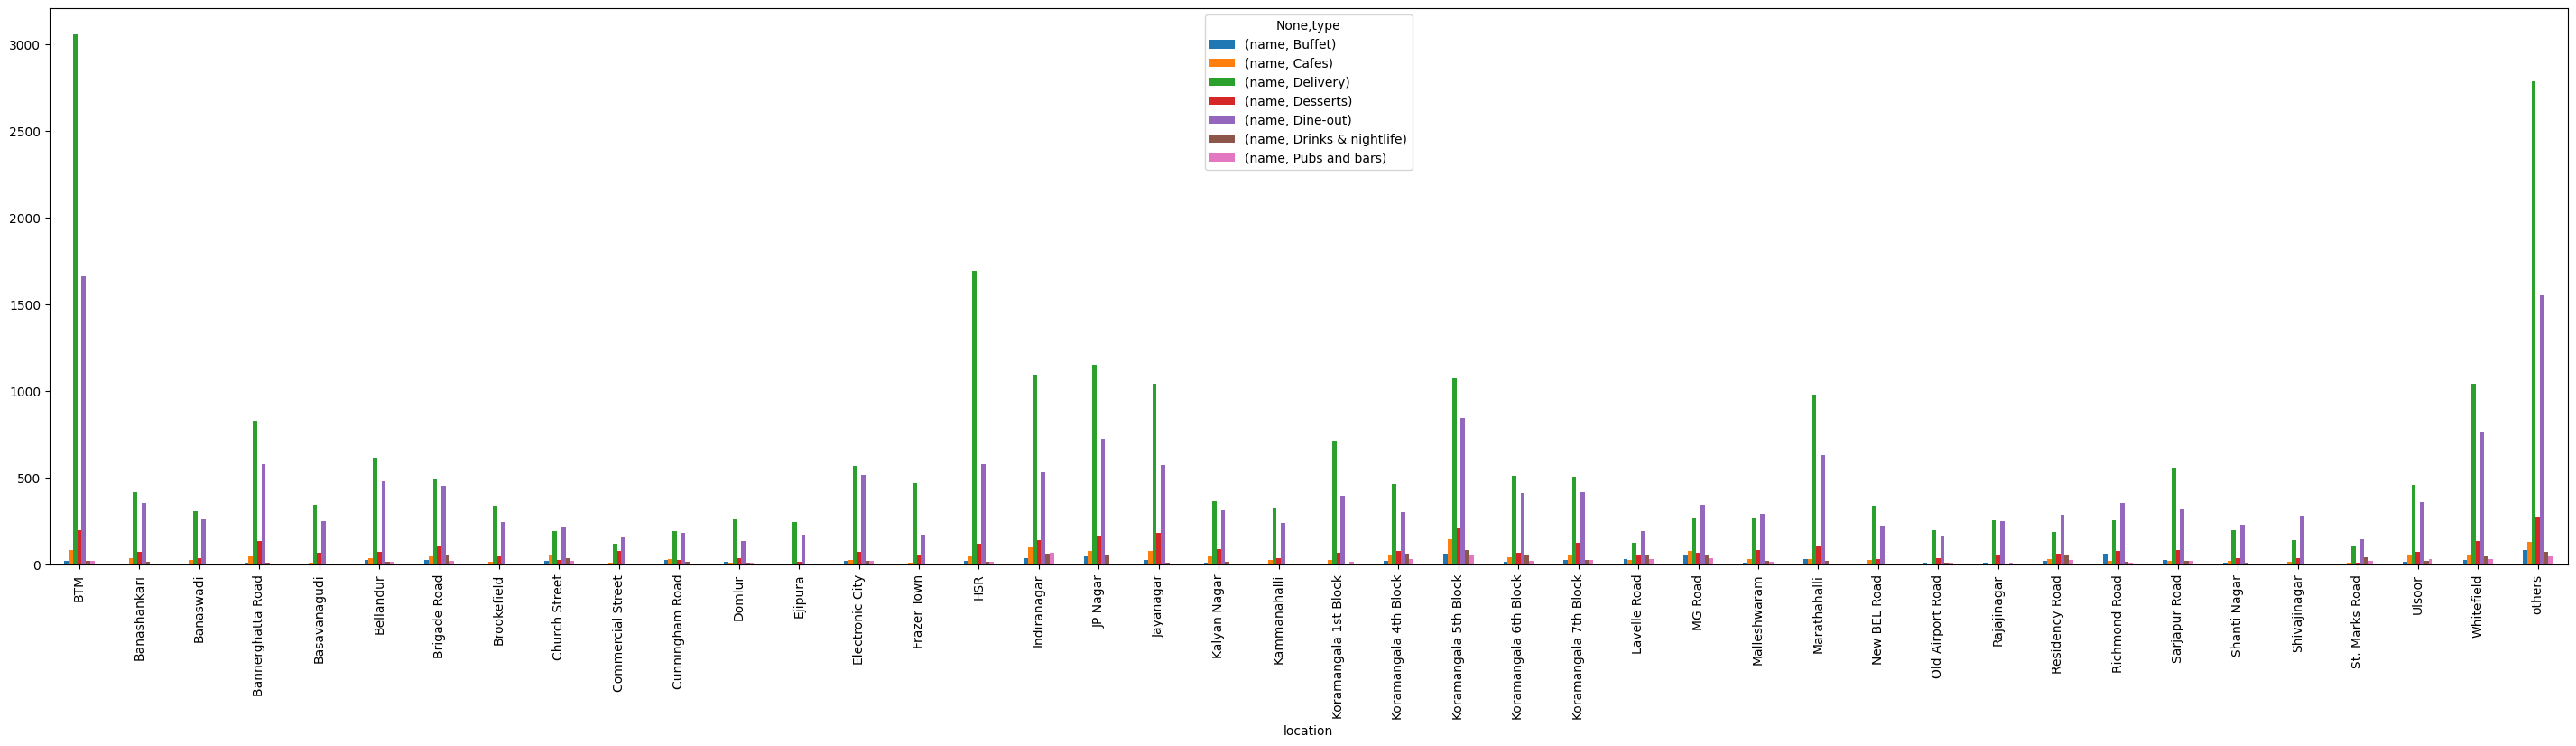

In [61]:
dataframe1.plot(kind='bar', figsize=(36,8))

In the above image we can figure out the places where pubs and bars are less and can open there considering the rating is good.